<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Neural_lesson1/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [57]:
import torch
import numpy as np

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [58]:
torch.cuda.is_available()

True

In [59]:
torch.cuda.device_count()

1

# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [60]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4060'

# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [61]:
tensor = torch.rand(2, 3)

print(tensor)
print(tensor.size())
print(tensor.dtype)
print(tensor.device)
print(tensor.requires_grad)

tensor([[0.5646, 0.7847, 0.7633],
        [0.3044, 0.0846, 0.0680]])
torch.Size([2, 3])
torch.float32
cpu
False


# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [62]:
tensor1 = torch.rand(100)
tensor2 = torch.rand(100)

mae = torch.mean(torch.abs(tensor1 - tensor2))

print(mae.item())

0.3649728000164032


# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 112х28х28

In [63]:
tensor1 = torch.rand(32, 28, 28)
tensor2 = torch.rand(16, 28, 28)
tensor3 = torch.rand(64, 28, 28)

combined_tensor = torch.cat((tensor1, tensor2, tensor3), dim=0)

print(combined_tensor.shape)

torch.Size([112, 28, 28])


# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [80]:
def f(x):
    return x**2 / 3 + torch.sin(torch.pi * x)

x = torch.tensor([2.0], requires_grad=True)

learning_rate = 1e-2
num_iterations = 5000

optimizer = torch.optim.SGD([x], lr=learning_rate, momentum=0.9)

for i in range(num_iterations):
    optimizer.zero_grad()
    y = f(x)
    y.backward()
    optimizer.step()

    if i % 500 == 0:
        print(f"Iteration {i}: x = {x.item()}, f(x) = {y.item()}")

print(f"Final result: x = {x.item()}, f(x) = {f(x).item()}")



Iteration 0: x = 1.9552507400512695, f(x) = 1.3333334922790527
Iteration 500: x = 1.4037208557128906, f(x) = -0.2977929711341858
Iteration 1000: x = 1.4037208557128906, f(x) = -0.2977929711341858
Iteration 1500: x = 1.4037208557128906, f(x) = -0.2977929711341858
Iteration 2000: x = 1.4037208557128906, f(x) = -0.2977929711341858
Iteration 2500: x = 1.4037208557128906, f(x) = -0.2977929711341858
Iteration 3000: x = 1.4037208557128906, f(x) = -0.2977929711341858
Iteration 3500: x = 1.4037208557128906, f(x) = -0.2977929711341858
Iteration 4000: x = 1.4037208557128906, f(x) = -0.2977929711341858
Iteration 4500: x = 1.4037208557128906, f(x) = -0.2977929711341858
Final result: x = 1.4037208557128906, f(x) = -0.2977929711341858


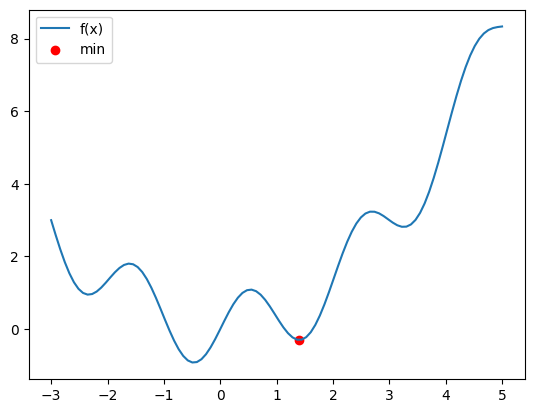

In [81]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [66]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

x = torch.tensor([420.0], requires_grad=True)
y = torch.tensor([420.0], requires_grad=True)

learning_rate = 1e-3
num_iterations = 1000

for i in range(num_iterations):
    z = f1(x, y)
    z.backward()

    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad

    x.grad.zero_()
    y.grad.zero_()

    if i % 100 == 0:
        print(f"Iteration {i}: x = {x.item()}, y = {y.item()}, f1(x, y) = {z.item()}")

print(f"Final result for f1: x = {x.item()}, y = {y.item()}, f1(x, y) = {f1(x, y).item()}")

Iteration 0: x = 420.000244140625, y = 420.000244140625, f1(x, y) = 0.23687744140625
Iteration 100: x = 420.024658203125, y = 420.024658203125, f1(x, y) = 0.22503662109375
Iteration 200: x = 420.049072265625, y = 420.049072265625, f1(x, y) = 0.2135009765625
Iteration 300: x = 420.07196044921875, y = 420.07196044921875, f1(x, y) = 0.2030029296875
Iteration 400: x = 420.09332275390625, y = 420.09332275390625, f1(x, y) = 0.19342041015625
Iteration 500: x = 420.11468505859375, y = 420.11468505859375, f1(x, y) = 0.18414306640625
Iteration 600: x = 420.13604736328125, y = 420.13604736328125, f1(x, y) = 0.175048828125
Iteration 700: x = 420.15740966796875, y = 420.15740966796875, f1(x, y) = 0.16619873046875
Iteration 800: x = 420.17877197265625, y = 420.17877197265625, f1(x, y) = 0.15753173828125
Iteration 900: x = 420.1976013183594, y = 420.1976013183594, f1(x, y) = 0.15020751953125
Final result for f1: x = 420.2157287597656, y = 420.2157287597656, f1(x, y) = 0.14312744140625


In [67]:
def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

learning_rate = 1e-3
num_iterations = 1000

for i in range(num_iterations):
    z = f2(x, y)
    z.backward()

    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad

    x.grad.zero_()
    y.grad.zero_()

    if i % 100 == 0:
        print(f"Iteration {i}: x = {x.item()}, y = {y.item()}, f2(x, y) = {z.item()}")

print(f"Final result for f2: x = {x.item()}, y = {y.item()}, f2(x, y) = {f2(x, y).item()}")

Iteration 0: x = 1.9916000366210938, y = 1.99399995803833, f2(x, y) = 9.866667747497559
Iteration 100: x = 1.6580251455307007, y = 1.471152663230896, f2(x, y) = 5.652504920959473
Iteration 200: x = 1.5609359741210938, y = 1.0589896440505981, f2(x, y) = 3.838778018951416
Iteration 300: x = 1.523820400238037, y = 0.7272871732711792, f2(x, y) = 2.7154409885406494
Iteration 400: x = 1.5205059051513672, y = 0.45745861530303955, f2(x, y) = 1.9819341897964478
Iteration 500: x = 1.5401320457458496, y = 0.23575380444526672, f2(x, y) = 1.4834020137786865
Iteration 600: x = 1.5735431909561157, y = 0.051781389862298965, f2(x, y) = 1.1318942308425903
Iteration 700: x = 1.611114740371704, y = -0.10210733860731125, f2(x, y) = 0.8797217607498169
Iteration 800: x = 1.6449054479599, y = -0.23135438561439514, f2(x, y) = 0.7003297805786133
Iteration 900: x = 1.6711702346801758, y = -0.33987870812416077, f2(x, y) = 0.5749552845954895
Final result for f2: x = 1.6898828744888306, y = -0.42991194128990173, f2

In [68]:
def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + \
  torch.cos(y)*torch.exp((1-torch.sin(x))**2) + \
  (x-y)**2

x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

learning_rate = 1e-3
num_iterations = 1000

for i in range(num_iterations):
    z = f3(x, y)
    z.backward()

    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad

    x.grad.zero_()
    y.grad.zero_()

    if i % 100 == 0:
        print(f"Iteration {i}: x = {x.item()}, y = {y.item()}, f3(x, y) = {z.item()}")

print(f"Final result for f3: x = {x.item()}, y = {y.item()}, f3(x, y) = {f3(x, y).item()}")

Iteration 0: x = 2.0031235218048096, y = 1.983518123626709, f3(x, y) = 113.10063171386719
Iteration 100: x = 2.082117795944214, y = 1.4960546493530273, f3(x, y) = 109.23965454101562
Iteration 200: x = 2.0568418502807617, y = 1.3999743461608887, f3(x, y) = 109.12965393066406
Iteration 300: x = 2.009514093399048, y = 1.358312964439392, f3(x, y) = 109.08916473388672
Iteration 400: x = 1.953424096107483, y = 1.3313020467758179, f3(x, y) = 109.05033874511719
Iteration 500: x = 1.8924598693847656, y = 1.3087677955627441, f3(x, y) = 109.00811767578125
Iteration 600: x = 1.828104853630066, y = 1.287676453590393, f3(x, y) = 108.96226501464844
Iteration 700: x = 1.7611361742019653, y = 1.2670965194702148, f3(x, y) = 108.91320037841797
Iteration 800: x = 1.6921221017837524, y = 1.2467530965805054, f3(x, y) = 108.8614501953125
Iteration 900: x = 1.6215827465057373, y = 1.2265790700912476, f3(x, y) = 108.80763244628906
Final result for f3: x = 1.5507731437683105, y = 1.206771969795227, f3(x, y) = 1